# Project 2 - Ames Housing Data
## Feature Analysis and Modeling

![House](phil-hearing-house-small.jpg)
<br>Photo by:
https://unsplash.com/photos/IYfp2Ixe9nM?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

In [346]:
houses = pd.read_csv('../datasets/train_processed.csv')
houses.head()

Id        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0  109  533352170           60          7       69.0552     13517       2   
1  544  531379050           60          7       43.0000     11492       2   
2  153  535304180           20          7       68.0000      7922       2   
3  318  916386060           60          7       73.0000      9802       2   
4  255  906425045           50          7       82.0000     14235       2   

   Alley  Lot Shape  Land Contour  ...  Neighborhood_OldTown  \
0      0          1             3  ...                     0   
1      0          1             3  ...                     0   
2      0          0             3  ...                     0   
3      0          0             3  ...                     0   
4      0          1             3  ...                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    1                     0   
1                   0                    0                     1   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    1   
4                     0                     0                    0   

   Neighborhood_Veenker  floors  bathrooms  
0                     0       2        3.0  
1                     0       2        4.0  
2                     0       1        2.0  
3                     0       2        3.0  
4                     0       2        2.0  

[5 rows x 109 columns]

#### Find which features are most correlated with SalePrice

In [347]:
print ('All features:' , houses.columns.values.tolist())

All features: ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch S

Don't include the Id or PID columns.

In [348]:
feature_list = houses.columns.values.tolist()[2:]

In [349]:
all_corrs = pd.DataFrame(houses[feature_list].corr()['SalePrice'].sort_values(ascending=False) )

# Idea taken from:
#https://git.generalassemb.ly/DSIR-1116/3.08-lesson-feature-engineering-and-model-workflow/blob/master/solution-code/power-transformer.ipynb

In [350]:
all_corrs.head()

SalePrice
SalePrice      1.000000
Overall Qual   0.804237
Exter Qual     0.719518
Gr Liv Area    0.716996
Kitchen Qual   0.694095

Create a list of the 30 most positively correlated features to start modeling with.

In [351]:
features_pos = []

for index in range(0,30):
    print(f'Feature: {all_corrs.iloc[index].name.ljust(30)} Correlation:  {all_corrs.iloc[index,0]} ')
    features_pos.append(all_corrs.iloc[index].name)
    
# found out about ljust here:
# https://stackabuse.com/padding-strings-in-python/

Feature: SalePrice                      Correlation:  1.0 
Feature: Overall Qual                   Correlation:  0.8042366379722609 
Feature: Exter Qual                     Correlation:  0.7195177217531578 
Feature: Gr Liv Area                    Correlation:  0.7169963373729336 
Feature: Kitchen Qual                   Correlation:  0.6940946373021661 
Feature: Total Bsmt SF                  Correlation:  0.6650687456465103 
Feature: Garage Area                    Correlation:  0.6538490444652901 
Feature: Garage Cars                    Correlation:  0.6485242649006802 
Feature: 1st Flr SF                     Correlation:  0.6465794362239704 
Feature: Bsmt Qual                      Correlation:  0.6124609615318116 
Feature: bathrooms                      Correlation:  0.6107168024392206 
Feature: Year Built                     Correlation:  0.5761797787454103 
Feature: Garage Yr Blt                  Correlation:  0.5553663787581444 
Feature: Year Remod/Add                 Correlation: 

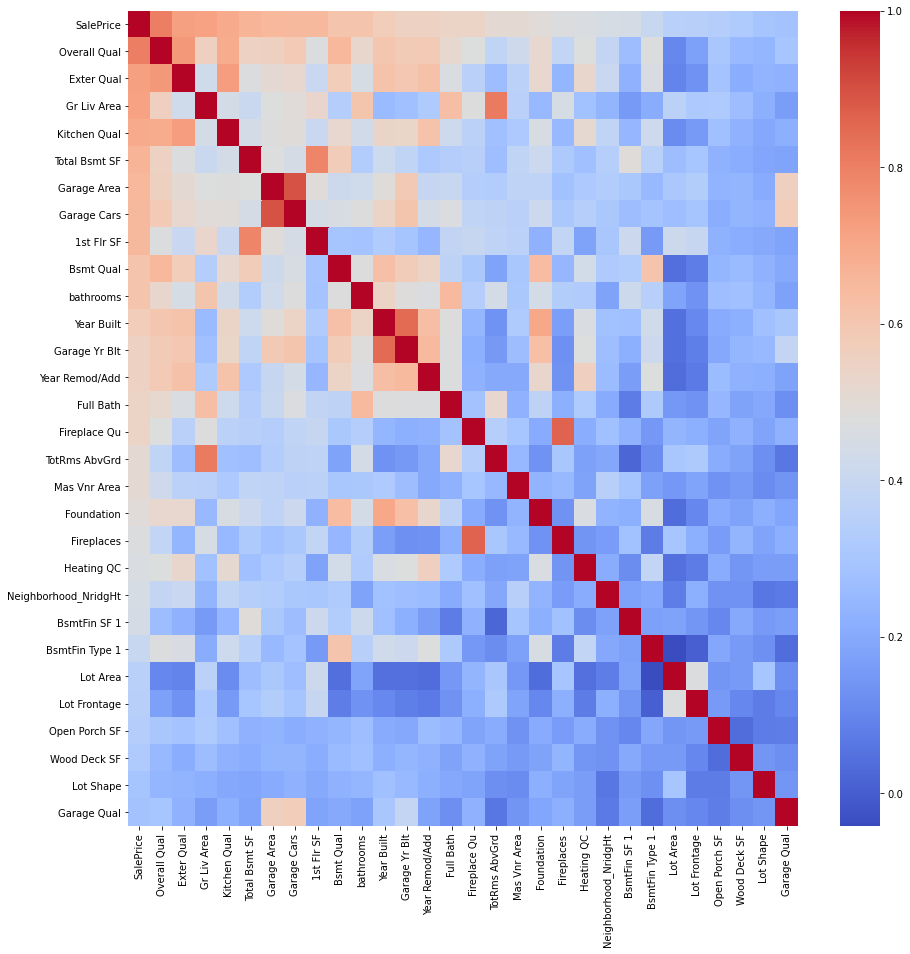

In [352]:
plt.figure(figsize=(15,15))
sns.heatmap(houses[features_pos].corr(), annot=False, cmap='coolwarm');

Drop some features that are highly correlated with each other.
For example, Garage Area and Garage Cars are highly correlated, so it's safe to drop one of them.

In [353]:
features_pos.remove('Garage Cars') # Highly correlated with Garage Area
features_pos.remove('TotRms AbvGrd') # Highly correlated with Gr Liv Area
features_pos.remove('Fireplaces') # Highly correlated with Fireplace Qu
features_pos.remove('1st Flr SF') # Highly correlated with Total Bsmt SF
features_pos.remove('BsmtFin Type 1') # Highly correlated with Bsmt Qual

# Very Important to remove SalePrice from our list of features
features_pos.remove('SalePrice')




---
Create a list of the 30 most negatively correlated features to model.

In [354]:
features_neg = []

for index in range(77,107):
    print(f'Feature: {all_corrs.iloc[index].name.ljust(30)} Correlation:  {all_corrs.iloc[index,0]} ')
    features_neg.append(all_corrs.iloc[index].name)
    

Feature: Land Contour                   Correlation:  -0.017005852614884246 
Feature: Neighborhood_Blueste           Correlation:  -0.02513902410521607 
Feature: Neighborhood_Mitchel           Correlation:  -0.03510992714813684 
Feature: Low Qual Fin SF                Correlation:  -0.04133865684608551 
Feature: Land Slope                     Correlation:  -0.04656312869907275 
Feature: Bsmt Half Bath                 Correlation:  -0.04696327544803656 
Feature: Neighborhood_NPkVill           Correlation:  -0.04719411725203394 
Feature: Sale Type                      Correlation:  -0.05253957737606454 
Feature: Condition 2                    Correlation:  -0.061586517952135926 
Feature: Neighborhood_SWISU             Correlation:  -0.07416183956136928 
Feature: Roof Matl                      Correlation:  -0.07995630851222744 
Feature: MS SubClass                    Correlation:  -0.08572445637776308 
Feature: Neighborhood_BrDale            Correlation:  -0.095630468120529 
Feature: Lot

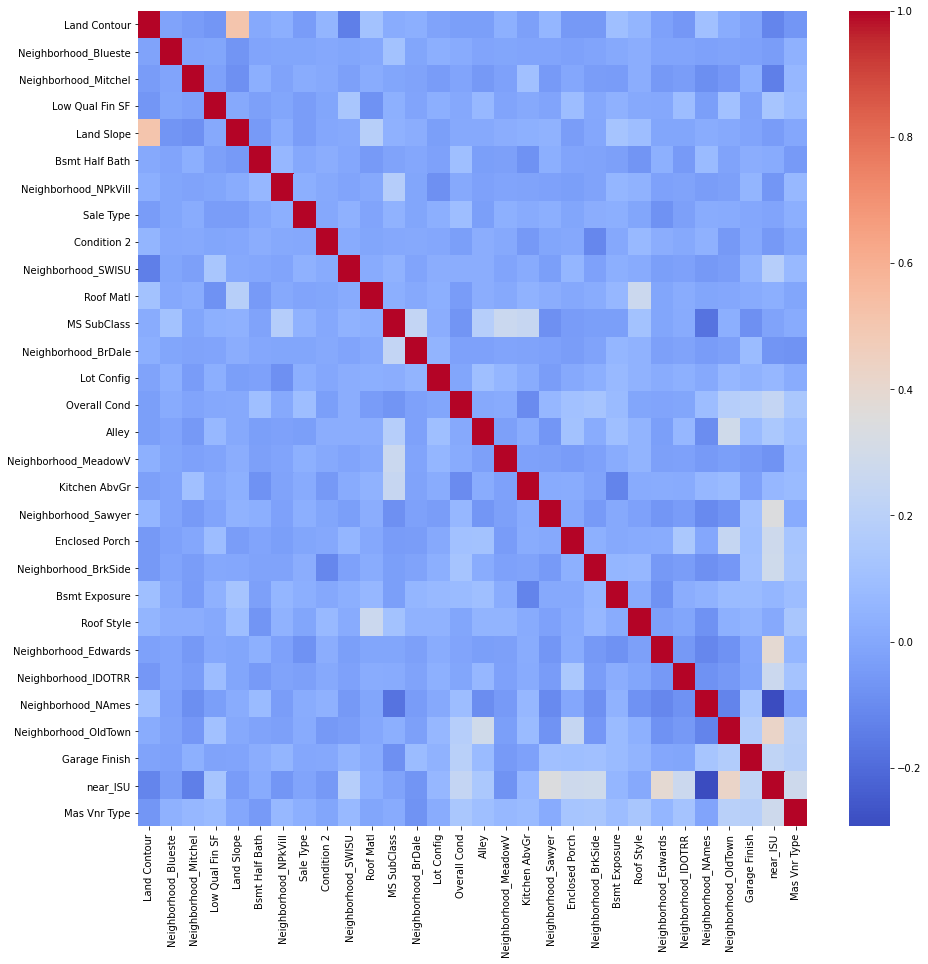

In [355]:
plt.figure(figsize=(15,15))
sns.heatmap(houses[features_neg].corr(), annot=False, cmap='coolwarm');

Drop a feature that is highly correlated.

In [356]:
features_neg.remove('Land Contour') # Highly correlated with Land Slope

### Model Creation
---

First test the **highly positively correlated** feature set.

In [357]:
X = houses[features_pos]
y = houses['SalePrice']

Create train and test sets, using 80-20 split

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

Scale the data

In [359]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

Create benchmark model with DummyRegressor, that will use the mean Sales Price

In [360]:
# Example from:
# https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
print (f'The r squared value of the dummy model using the mean Sales Price: {dummy_regr.score(X_test, y_test)}')

The r squared value of the dummy model using the mean Sales Price: -0.013728319224632246


### Linear Regression Model

In [361]:
lr = LinearRegression()

In [362]:
 lr.fit (X_train, y_train)

LinearRegression()

In [363]:
y_preds = lr.predict(X_test)
print (f'The r squared value of the linear regresssion model with highly positively features: {r2_score(y_test, y_preds)}') 

The r squared value of the linear regresssion model with highly positively features: 0.8576575980804226


In [364]:
pd.DataFrame(list(zip(X.columns, lr.coef_)))

# From class session 3.03
# https://git.generalassemb.ly/pdmill/3.03-intro-to-linear-regression/blob/master/linear-regression-starter.ipynb

0             1
0           Overall Qual  18449.686248
1             Exter Qual   9264.285332
2            Gr Liv Area  24642.759713
3           Kitchen Qual   6771.569176
4          Total Bsmt SF   8604.926141
5            Garage Area   3954.848426
6              Bsmt Qual   1286.083995
7              bathrooms   -777.846274
8             Year Built   4185.594175
9          Garage Yr Blt   1235.461876
10        Year Remod/Add   3083.499374
11             Full Bath  -3485.979857
12          Fireplace Qu   3549.587191
13          Mas Vnr Area   3827.107263
14            Foundation   -568.375252
15            Heating QC   1739.356089
16  Neighborhood_NridgHt   4081.538385
17          BsmtFin SF 1  11028.704628
18              Lot Area   7021.809584
19          Lot Frontage   2012.032835
20         Open Porch SF    753.517706
21          Wood Deck SF   1445.014718
22             Lot Shape     76.589292
23           Garage Qual  -1635.457317

### Lasso Regression Model

In [365]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train, y_train);   # Changed from Z_train to X_train since X_train has our scaled data

# Borrowed from
# https://git.generalassemb.ly/DSIR-1116/4.02-lesson-regularization/blob/master/solution-code/solution-code.ipynb

In [366]:
print(f'Lasso CV score with training data: {lasso_cv.score(X_train, y_train)} ')
print(f'Lasso CV score with testing data: {lasso_cv.score(X_test, y_test)} ')

Lasso CV score with training data: 0.8886892369495056 
Lasso CV score with testing data: 0.8576601144898266 


### Ridge Regression Model

Code borrowed from class 4.02

In [367]:
ridge_model = Ridge(alpha=10)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train, y_train)

In [368]:
# Here is the optimal value of alpha
ridge_cv.alpha

10

In [369]:
print(f'Ridge CV score with training data: {ridge_cv.score(X_train, y_train)} ')
print(f'Ridge CV score with testing data: {ridge_cv.score(X_test, y_test)} ')

Ridge CV score with training data: 0.8886740562102724 
Ridge CV score with testing data: 0.858223857845129 


The model with the highest $R^2$ is Lasso, 0.888689, which was slightly better than Ridge.<br>
The Ridge model performed slightly higher on the testing data.

All three models performed much better than the mean baseline, which had a $R^2$ score of -0.013

---
The highly positively correlated feature set was used first.  Next try the most **negatively correlated**.

In [370]:
X = houses[features_neg]
y = houses['SalePrice']

Create train and test sets, using 80-20 split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [372]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Linear Regression Model

In [373]:
lr = LinearRegression()
lr.fit (X_train, y_train)

LinearRegression()

In [374]:
y_preds = lr.predict(X_test)
print (f'The r squared value of the linear regresssion model with highly negatively correlated features: {r2_score(y_test, y_preds)}') 

The r squared value of the linear regresssion model with highly negatively correlated features: 0.4797756601513852


### Lasso Regression Model

In [375]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train, y_train);   # Changed from Z_train to X_train since X_train has our scaled data

# Borrowed from
# https://git.generalassemb.ly/DSIR-1116/4.02-lesson-regularization/blob/master/solution-code/solution-code.ipynb

In [376]:
print(f'Lasso CV score with training data: {lasso_cv.score(X_train, y_train)} ')
print(f'Lasso CV score with testing data: {lasso_cv.score(X_test, y_test)} ')

Lasso CV score with training data: 0.5186202396035737 
Lasso CV score with testing data: 0.47978505708342545 


### Ridge Regression Model

Code borrowed from class 4.02

In [377]:
ridge_model = Ridge(alpha=10)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train, y_train)

In [378]:
# Here is the optimal value of alpha
ridge_cv.alpha

10

In [379]:
print(f'Ridge CV score with training data: {ridge_cv.score(X_train, y_train)} ')
print(f'Ridge CV score with testing data: {ridge_cv.score(X_test, y_test)} ')

Ridge CV score with training data: 0.5185692142977261 
Ridge CV score with testing data: 0.4798582637171265 


All three of these models with this feature set performed poorly, especially when compared to the first set of postively correlated features ( $R^2$ around 0.89 for train, 0.86 for test).

